In [1]:
!pip install nilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 95.7 MB/s eta 0:00:00


In [2]:
import nilearn
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

The task starts with 15 seconds of visual cue (fixation cross) and then alternates between motor task (32 seconds) and fixation cross (15 seconds). The motor task is a 2-forced decision task: on the screen the work RIGHT or LEFT is displayed and the volunteer has to press a button held in his right or left hand. Button press time are recorded (right.txt and left.txt) as well as BOLD signal (motor_bold.nii, 110 scans acquired every 2.5 seconds). Prior to the fMRI acquisition, a structural image has been acquired (structural.nii).

In [30]:
events = [["begin time","duration","amplitude"]]
## amplitude 1 as motor task 0 as fixation cross
events.append([0,15,0])
time = 15;
time_rest = 15;
time_task = 32;
for i in range(15):
  if i%2==0:
    events.append([time,32,1])
    time= time+time_task
  else:
    events.append([time,15,0])
    time = time + time_rest
print(events)

[['begin time', 'duration', 'amplitude'], [0, 15, 0], [15, 32, 1], [47, 15, 0], [62, 32, 1], [94, 15, 0], [109, 32, 1], [141, 15, 0], [156, 32, 1], [188, 15, 0], [203, 32, 1], [235, 15, 0], [250, 32, 1], [282, 15, 0], [297, 32, 1], [329, 15, 0], [344, 32, 1]]


In [ ]:
events = [["begin time","duration","amplitude"]]
## amplitude 1 as motor task RIGHT -1 as motor task LEFT 0 as fixation cross
events.append([0,15,0])
time = 15;
time_rest = 15;
time_task = 32;


print(events)

In [31]:
import csv
with open('events.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerows(events)

In [32]:
import pandas as pd
events = pd.read_csv("events.csv")
events

,begin time,duration,amplitude
0,0,15,0
1,15,32,1
2,47,15,0
3,62,32,1
4,94,15,0
5,109,32,1
6,141,15,0
7,156,32,1
8,188,15,0
9,203,32,1


In [54]:
img_structral = nib.load("structural.nii")
data_structral = img_structral.get_data()
img_motor = nib.load("motor_bold.nii")
data_motor = img_motor.get_data()

<ipython-input-54-7230bf205287>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data_structral = img_structral.get_data()
<ipython-input-54-7230bf205287>:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  data_motor = img_motor.get_data()


In [ ]:
from nilearn.datasets import fetch_spm_auditory
subject_data = fetch_spm_auditory()
subject_data.func

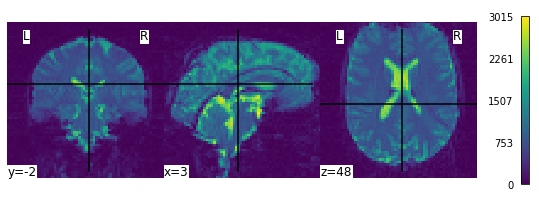

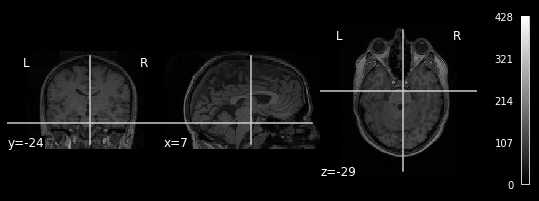

In [51]:
from nilearn.plotting import plot_stat_map, plot_anat, plot_img
plot_img(subject_data.func[0], colorbar=True, cbar_tick_format="%i")
plot_anat(subject_data.anat, colorbar=True, cbar_tick_format="%i")

In [46]:
from nilearn.image import concat_imgs, mean_img
fmri_img = concat_imgs(subject_data.func)

In [47]:
from nilearn.glm.first_level import FirstLevelModel

In [48]:
fmri_glm = FirstLevelModel(t_r=2.5,
                           noise_model='ar1',
                           standardize=False,
                           hrf_model='spm',
                           drift_model='cosine',
                           high_pass=.01)

In [49]:
fmri_glm = fmri_glm.fit(fmri_img, events)

ValueError: ignored

In [50]:
design_matrix = fmri_glm.design_matrices_[0]

IndexError: ignored

In [4]:
from numpy import array
conditions = {
    'active': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.]),
    'rest':   array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                     0.]),
}
active_minus_rest = conditions['active'] - conditions['rest']

In [ ]:
from nilearn.plotting import plot_contrast_matrix
plot_contrast_matrix(active_minus_rest, design_matrix=design_matrix)